<a href="https://colab.research.google.com/github/Amanlath1/product-reviewer/blob/main/projectdt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# New Section

In [ ]:
df = pd.read_csv('/content/Reviews.csv',error_bad_lines=False, engine="python")


FileNotFoundError: ignored

In [ ]:
print(df.shape)
df.head()

NameError: ignored

In [ ]:
# for all data is too heavy, make it slim by chose
df2 = df.sample(frac= 0.20,replace = True).reset_index(drop = True)

print(df2.shape)
df2.head()

(106491, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,169605,B001397WV2,A3SA94UQ3AZMEU,CatLady,1,1,5,1339632000,The best,"I have tried every ""good"" cat food on the mark..."
1,332119,B0015MIGGW,A1VJ3BFL1AM5DU,ktm,0,0,5,1327190400,Cheetos are out.,Michael Season's baked cheese snacks are in. I...
2,401635,B000Q611U6,A1Q8465PZ2DIMO,"B. Miller ""mom x 2""",0,0,5,1251417600,Better than Fruit Roll Ups!!,These taste better and have better texture tha...
3,167829,B001EQ5F04,AT1OWYV4BQCL4,CMS,0,0,5,1320364800,LOVE THIS STUFF!!!,I wish I would have ordered more than I did la...
4,400930,B0016PC4TS,A1MKPMJPD22YY,"S. Cline ""Retired Fed""",1,1,5,1342656000,FOR THOSE LIVING IN THE TROPIC ZONE - THIS STU...,YAY!! A 5 lb Havahart Critter Ridder is not av...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106491 entries, 0 to 106490
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      106491 non-null  int64 
 1   ProductId               106491 non-null  object
 2   UserId                  106491 non-null  object
 3   ProfileName             106488 non-null  object
 4   HelpfulnessNumerator    106491 non-null  int64 
 5   HelpfulnessDenominator  106491 non-null  int64 
 6   Score                   106491 non-null  int64 
 7   Time                    106491 non-null  int64 
 8   Summary                 106488 non-null  object
 9   Text                    106491 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.1+ MB


In [ ]:
print(df2.isna().sum())
df2.dropna(inplace= True)
df2.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   3
Text                      0
dtype: int64


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

What is the distribution of ratings across dataset


In [ ]:
print(df2['Score'].value_counts())
rating_pct = df2['Score'].value_counts()/len(df) * 100
rating_pct

5    67999
4    15039
1     9719
3     8070
2     5658
Name: Score, dtype: int64


5    12.770797
4     2.824453
1     1.825312
3     1.515615
2     1.062621
Name: Score, dtype: float64

ditsributoin review(score)

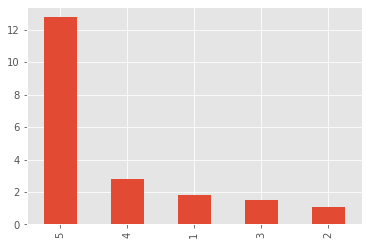

In [ ]:
rating_pct.plot.bar()
plt.show()


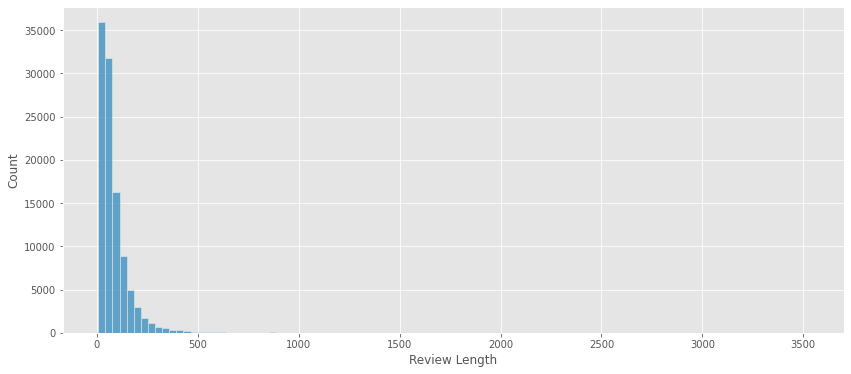

In [ ]:
plt.figure(figsize = (14,6))
WordsPerReview = df2['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

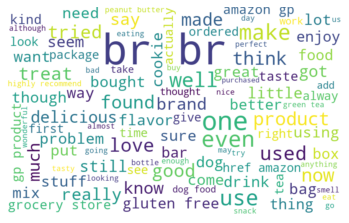

In [ ]:
txt = ' '.join(review for review in df2.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df2 = pd.DataFrame(df2,columns = ['Score','Text'])
df2.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1
df2['Sentiment'] = df2['Rating'].apply(apply_sentiment)
df2.drop(['Rating'],axis = 1, inplace = True)
sentiment = df2['Sentiment'].value_counts()
sentiment

1    106485
Name: Sentiment, dtype: int64

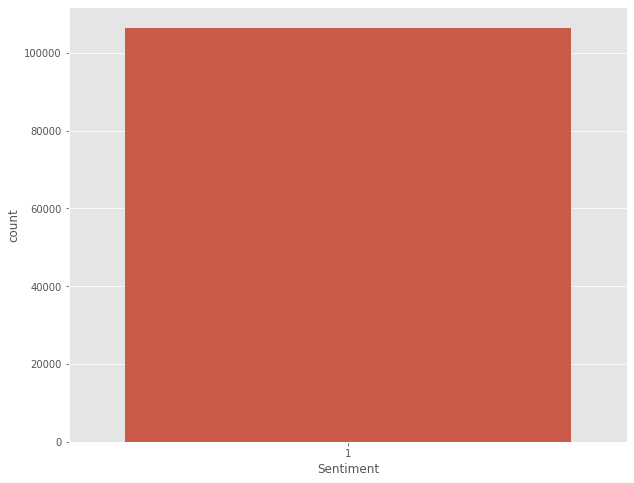

In [ ]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df2, x = 'Sentiment')
plt.show()

In [ ]:
df2['Review']


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
106486   NaN
106487   NaN
106488   NaN
106489   NaN
106490   NaN
Name: Review, Length: 106485, dtype: float64

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df2['reviews_text'] = df2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
df2['reviews_text'] = df2['reviews_text'].apply(lambda row: ','.join(row))

LookupError: ignored